# Cvičení 9

Jedna z nejefektivnějších metod pro iterační řešení soustav lineárních rovnic se se symetrickou pozitivně definitní maticí je metoda sdružených gradientů (anglicky Conjugate Gradient Method, CG).

## Metoda sdružených gradientů

CG je gradientní iterační metoda, která vytváří posloupnost A-ortogonálních (sdružených) vektorů. Nový vektor je z předchozích určen pomocí postupu založeného na Gramově-Schmidtově ortogonalizaci. Využijte pseudokód z přednášky.

### Příklad 1

Doplňte správné řešení Metody sdružených gradientů do buňky níže dle algoritmu z přednášek: 

$$
\begin{array}{l}
\text{Input: SPD matrix } A, \text{ right-hand side vector } b, \text{ initial approximation } x_0, \epsilon \in (0,1), \text{ maximum number of iterations max\_it.}\\
\ \\
k = 0  \\
\ \\
d^0 := r^0 := b - Ax^0 \\
\ \\
\text{\bf{while} } ||r^k|| /||r^0|| > \epsilon \\
\ \\    
\quad\begin{array}{l}
    %\alpha_k := (r^k)^T d^k / (d^k)^T A d^k \\
    \alpha_k := \frac{(r^k)^T d^k} {(d^k)^T A d^k} \\
    \ \\    
    x^{k+1} := x^k + \alpha_k d^k \\ 
    \ \\    
    r^{k+1} := r^k - \alpha_k Ad^k \\ 
    \ \\     
    %\beta_k := (r^k)^T d^k / (d^k)^T A d^k \\
    \beta_k := \frac{(r^{k+1})^T A d^k} {(d^k)^T A d^k} \\
    \ \\    
    d^{k+1} := r^{k+1} - \beta_k d^k \\
    \ \\
    k = k + 1 \\
\end{array}\\
\ \\
\text{end while}\\
\ \\
\text{The solution is stored in } x^{k}.\\
\end{array}
$$

In [1]:
import numpy as np

In [2]:
# ÚKOL: Doplňte chybějící kód ve while cyklu metody sdružených gradientů

def conjugate_gradients(A, b, x0, epsilon=1e-8, max_it=1000):
    """
    Resi system Ax=b s SPD matici A pomoci metody sdruzenych gradientu.
    A: matice soustavy
    b: vektor prave strany
    x0: pocatecni odhad
    epsilon: relativni presnost
    max_it: maximalni pocet iteraci
    """
    # citac iteraci
    k = 0

    # vektor pocatecniho rezidua a pocatecniho smeru
    x = x0 # x0.copy()
    d = r = b - A @ x
    # d = r.copy()
 
    # vytvorime pole, do ktereho budeme ukladat normy rezidua v jednotlivych iteracich
    residuals = [np.linalg.norm(r)]
 
    # pro vypocet ukoncovaci podminky   
    r0_norm = np.linalg.norm(b - A @ x0)    
       
    while k < max_it and ((np.linalg.norm(r) / r0_norm) > epsilon):
        # pomocny vypocet (usetrime 4 operace nasobeni matice-vektor):
        Ad = A @ d
        
        #  vypoctete alpha_k, x_{k+1} and r_{k+1}:
        alfa = (r.T @ d) / (r.T @ Ad)
        x = x + alfa * d
        r_new = r - alfa * Ad
        
        # vypoctete beta_k, d_{k+1}:
        beta = (r_new.T @ Ad) / (d.T @ Ad)
        d = r_new - beta * d
        r = r_new
        
        # navysime citac iteraci
        k += 1        
    
        # ulozime reziduum
        residuals.append(np.linalg.norm(r))

    return x, k, residuals


In [3]:
# Otestujeme vasi metodu

n = 100
U = np.triu(np.random.rand(n, n), 1)
d = 100 * np.random.rand(n, 1)
A = np.diag(d.flatten()) + U + U.T  # matice soustavy
b = np.random.rand(n, 1)            # vektor prave strany
x0 = np.zeros((n, 1))               # pocatecni odhad reseni

x, k, _ = conjugate_gradients(A, b, x0, 1e-8, 100)
x_np = np.linalg.solve(A, b)
print("Pocet iteraci: {}".format(k))
print("||x - x_np|| = {}".format(np.linalg.norm(x - x_np)))

Pocet iteraci: 73
||x - x_np|| = 7.77408352069169e-10


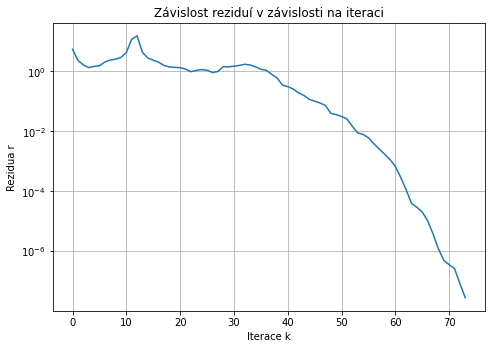

In [ ]:
# UKOL: upravte metodu tak, aby vracela vektor residuals, na jehoz konec v kazde 
# iteraci ulozite aktualni normu rezidua.
# Pote pomoci knihovny matplotlib vykreslete graf normy rezidua v zavislosti na iteraci.
#
# Graf by mel obsahovat: Nadpis (title), popisky os, mrizku (grid)
#
# Pro lepsi prehlednost se pokuste graf vykreslit take s logaritmickou skalou na ose y.
import matplotlib.pyplot as plt

_, k, rezidua = conjugate_gradients(A, b, x0)

fig = plt.figure()
axes = fig.add_axes((0, 0, 1, 1))
axes.set_title("Závislost reziduí v závislosti na iteraci")
axes.set_xlabel("Iterace k")
axes.set_ylabel("Rezidua r")
axes.set_yscale("log")
axes.grid(True)
axes.plot(list(range(k+1)), rezidua)
